# SVM (Support Vector Machines)

# Support Vector Machines Theory

- supervised learning algorithm
- core idea: find the optimal hyperplane that maximally separates the classes (maximum margin)
- from linear to non-linear classification by using kernel trick
- from low dimensional space to high dimensional space
- decision boundary -  decision surface
- Parameters: 
    - C represents cost of misclassification. A large C means that we are penalizing the errors more restricly so the margin will be narrower ie overfitting (low bias, high variance)
    - Gamma is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’.

Support Vector Machines (SVMs) are a **powerful and widely-used supervised learning algorithm that can be used for both classification and regression tasks**. They are particularly known for their **high accuracy in classification problems** and are often **used in various applications such as text classification, image classification, and bioinformatics**.

**The core idea behind the SVM algorithm is to find the optimal hyperplane that maximally separates the classes while having the largest margin, which means the distance between the hyperplane and the closest data points from both classes**. The hyperplane is chosen in such a way that **it maximizes the distance from the closest training data points of each class, called support vectors**. **These support vectors are the key element of the SVM algorithm, as the position of the hyperplane is completely determined by them.**

2 class arasi sonsuz hyperplane cizilebilir, ama en iyisi icin support vectorler devreye giriyor, her iki sinifin en yakin iki noktasi supoort vector olarak hyperplanein sinirlarini belirliyor. hyperplanedeki ana amac, suppor vectorler arası mesafeyi, yani margini maximize etmek, bu durumda best hyperplane oluyor.

Asagidaki resimde A'da overfitting var,, max margin icin B daha iyi ayrica. Ada margin nerdeyse sifir. B daha iyi genelleme yapabiliyor. Siniflarin daha iyi eblirlenebilmesi icin biraz bias'a izin veriyoruz.

Hard margin hatalara izin vermeyen, overfittinge giden bir margindir. Soft margin ise cok az hataya izin veren ama genelleme yapabilen modellerde olur. C parametresi ile oynayarak bu ayarlanmaya calisilir.

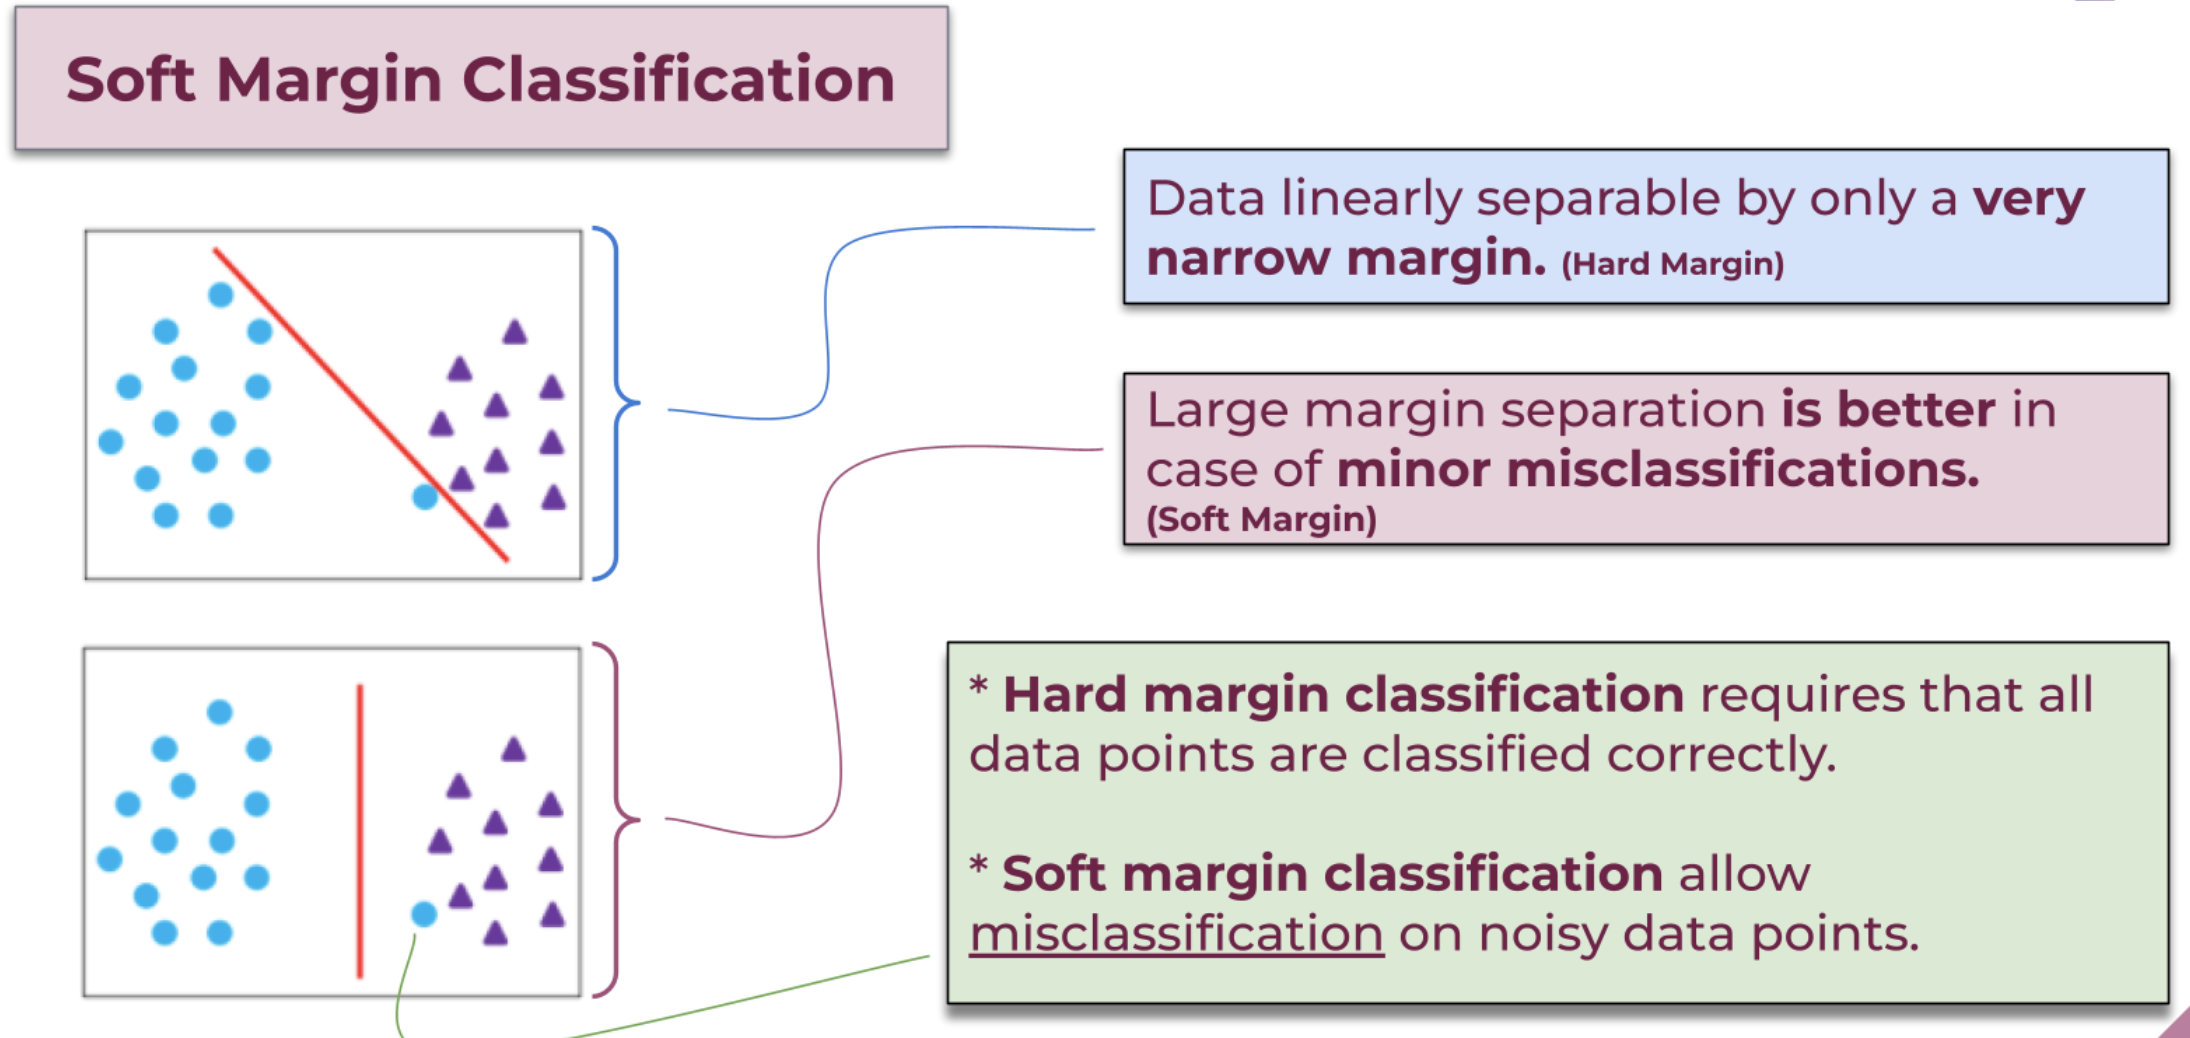

The goal of the SVM algorithm is to find the hyperplane that optimally separates the classes, taking into account the variables. In cases **where the data is not linearly separable, SVM can be extended to non-linear classification by using kernel trick**, it's called **kernel SVM**. This technique maps the data into a high-dimensional space where it becomes linearly separable, hence providing high accuracy. The figure below shows multiple lines could be used to separate the two classes, but the SVM algorithm finds the one which is optimal and has the maximum margin. Kernel trick dataya boyut kazandırarak daha iyi bir hyperpalene ulasmamizi sagliyor.

- c parametresi errorların regularization parametresidir. With the changes in C prameter we can change the margin size and determine how much error we have tolerance.

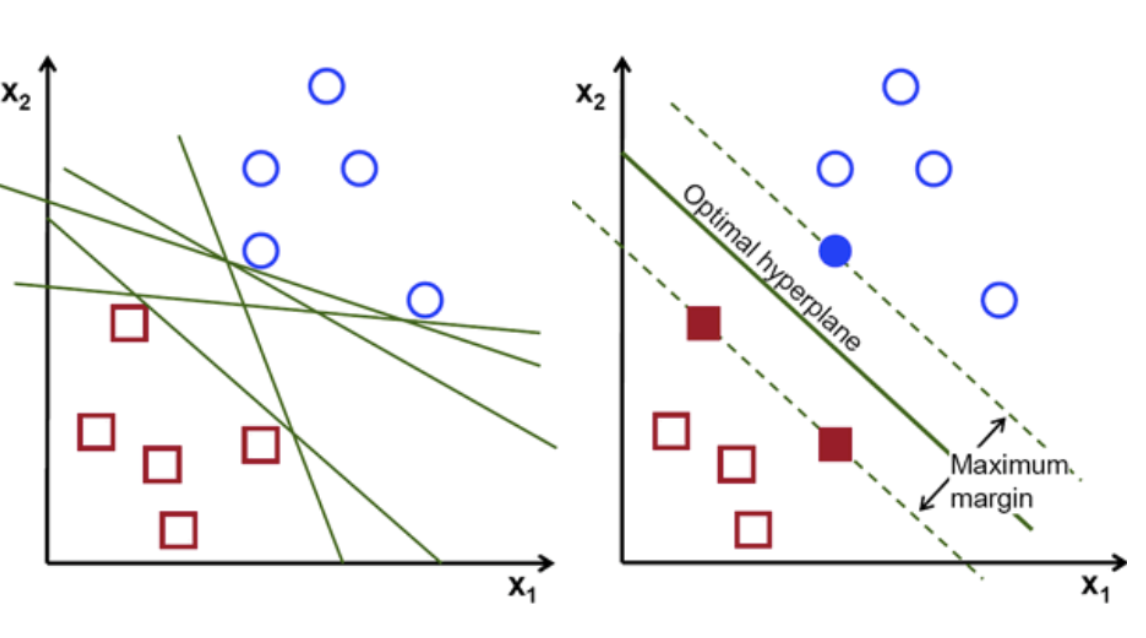

Working method of the SVM algorithm:

- First, it determines the hyperplanes that correctly classify classes.
- Selects the hyperplane that is the farthest from the data between the hyperplanes it finds.

**If the data cannot be divided linearly…**

It is easy to find the optimal hyperplane in linearly separated classification problems. However, in real cases, the data are more intricate. Most probably we have more features to analyze, and our hyperplane will not a linear line as you can see below.

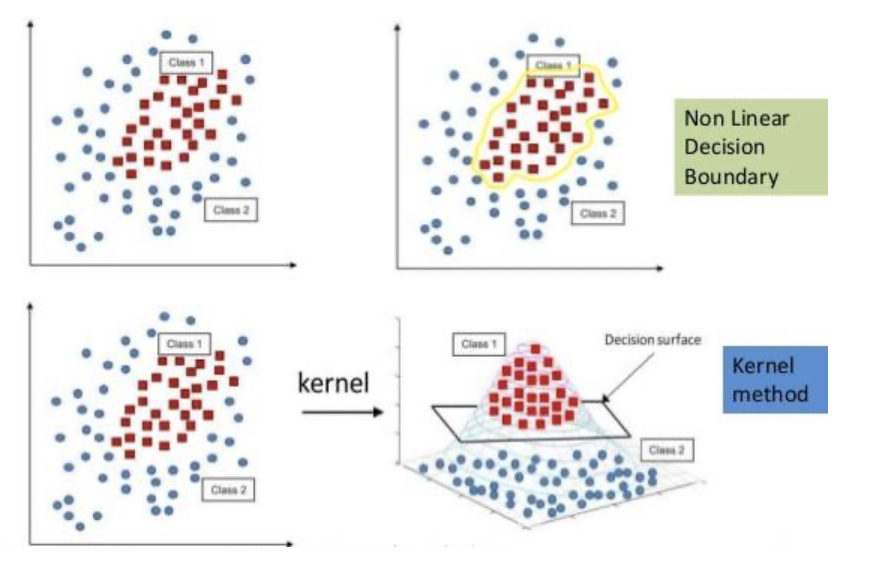

We can be able to find a **decision surface that clearly divides between different classes by data transformation. This data transformation process is to map all the data points to a higher dimension (in this case, 3D), find the boundary or Decision Surface, and make the classification.** The original feature space (2D) can be mapped to the higher dimensional feature space (3D) in this example. **This kind of sizing is called a mapping function**. We can achieve a hyperplane (decision surface in the picture) by increasing only one dimension (2D to 3D). 

In the example, we moved from 2D space to 3D space. It is obvious that the more size of the space we are going to transition, the more number of operations we need to do. **The disadvantage is that it is difficult to apply in large data sets because it consumes a lot of power. To prevent this problem, the method called Kernel Trick is used in SVM Algorithms**. It allows us to operate in the original feature space without computing the coordinates of the data in a higher-dimensional space. 

Hangi kernel fonksiyonunu sececegiz:

- defaultu rbf. 
- data linear ayriliyorsa linear. Feature sayisi cok ve gozlem sayisi az ise linear svm daha iyi sonuc verir
- birbiriyle icice gecmis kompleks datalarda, feature sayisi gozlem sayisina gore daha az olanlarda rbf..

Hepsini deneyip gridsearch ile en iyisini bulmaya calisacagiz.

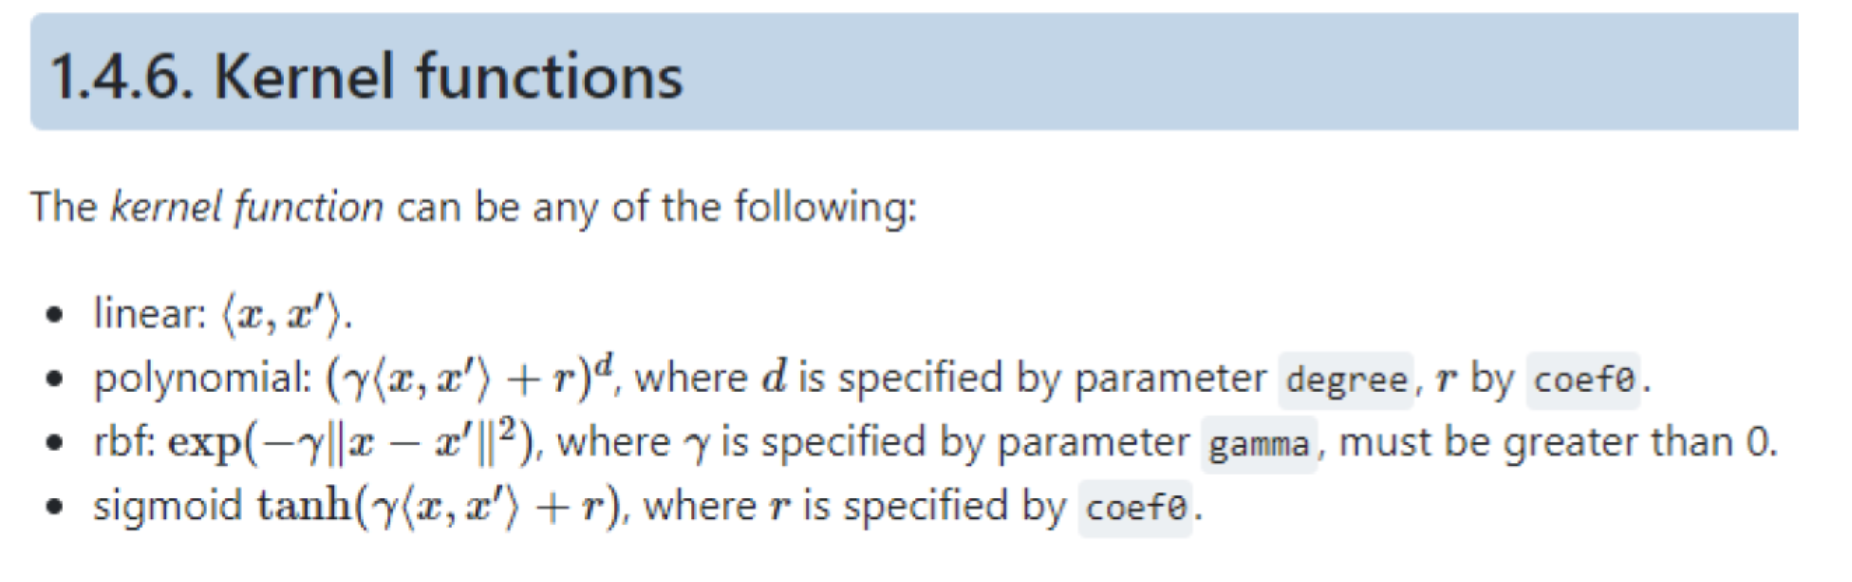

C parametresi default 1. buyurse hard margin (daha az hataya izin verir), kücülürse soft margin (daha fazla hataya izin verir). C değeri ne kadar büyükse, model aykırı değerlere daha az izin verir ve sınıflandırma hatası daha az olur. Ancak, aynı zamanda aşırı öğrenme (overfitting) riski de artar. C değeri ne kadar küçükse, model aykırı değerlere daha fazla izin verir ve sınıflandırma hatası daha büyük olabilir, ancak aşırı öğrenme riski de azalır.

Gamma parameter default 1. buyudukce overfittinge gider, kuculdukce daha soft bir ayrim yapar. gamma arttikca overfite gider

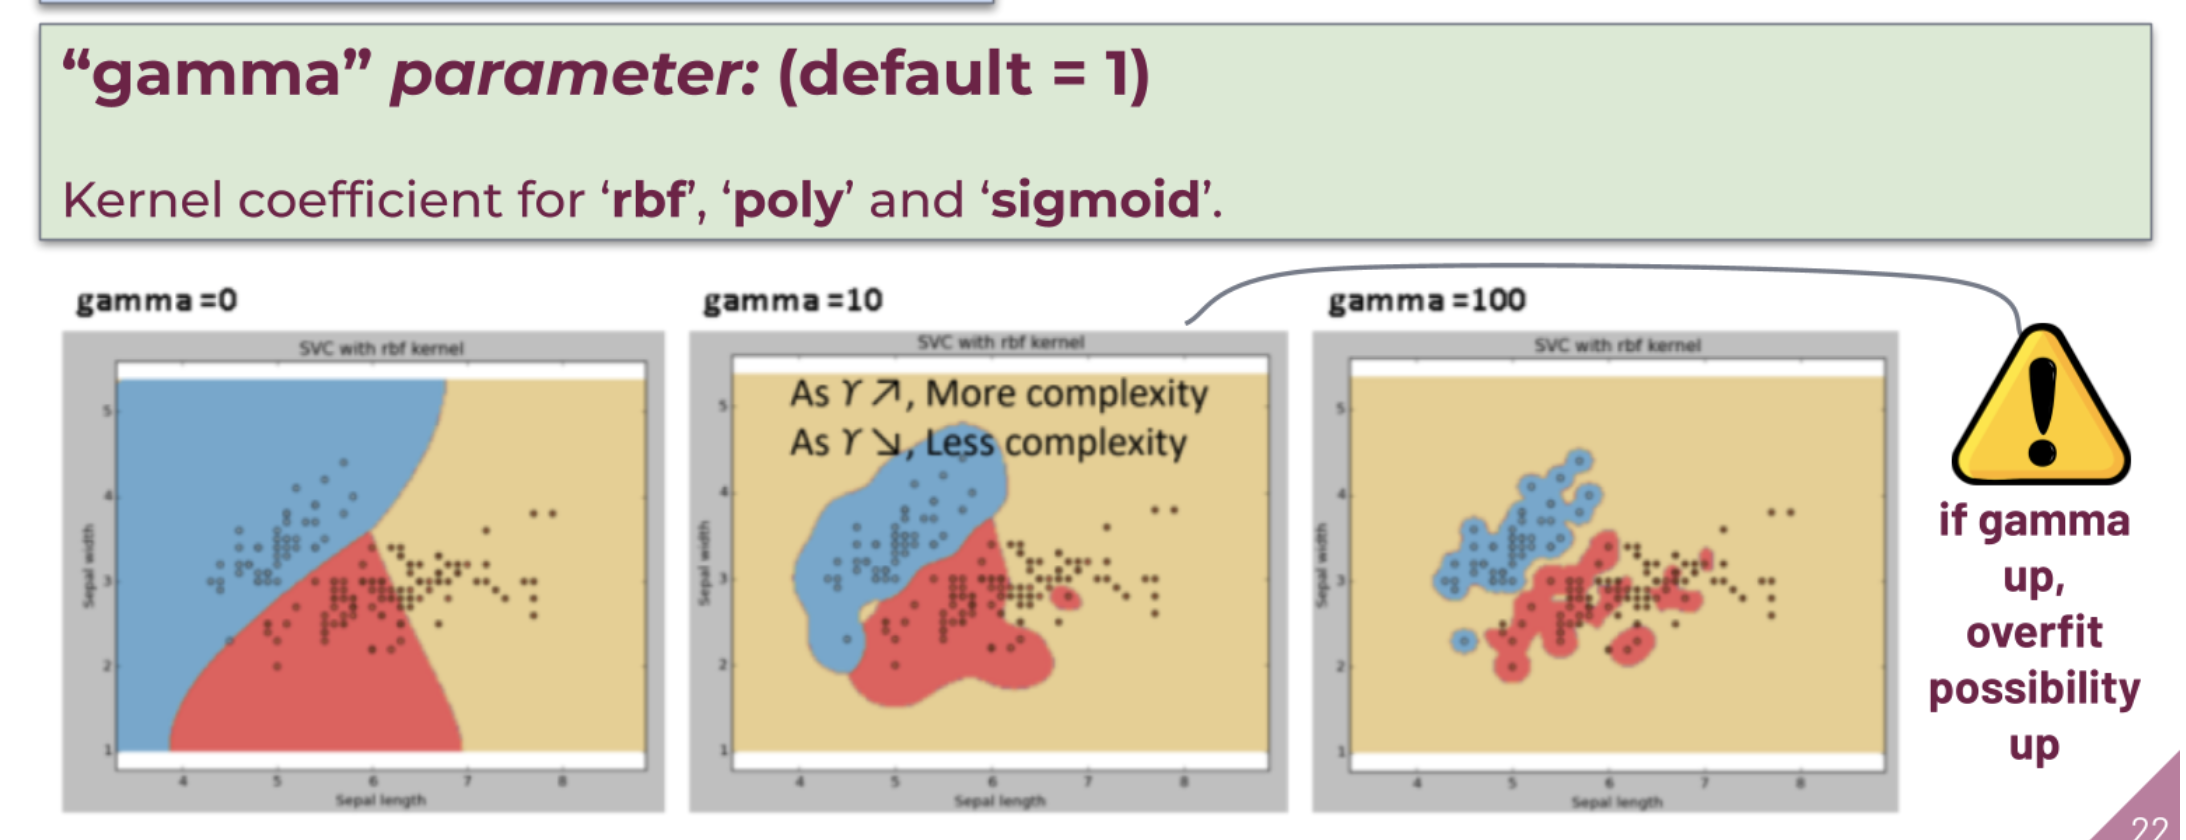

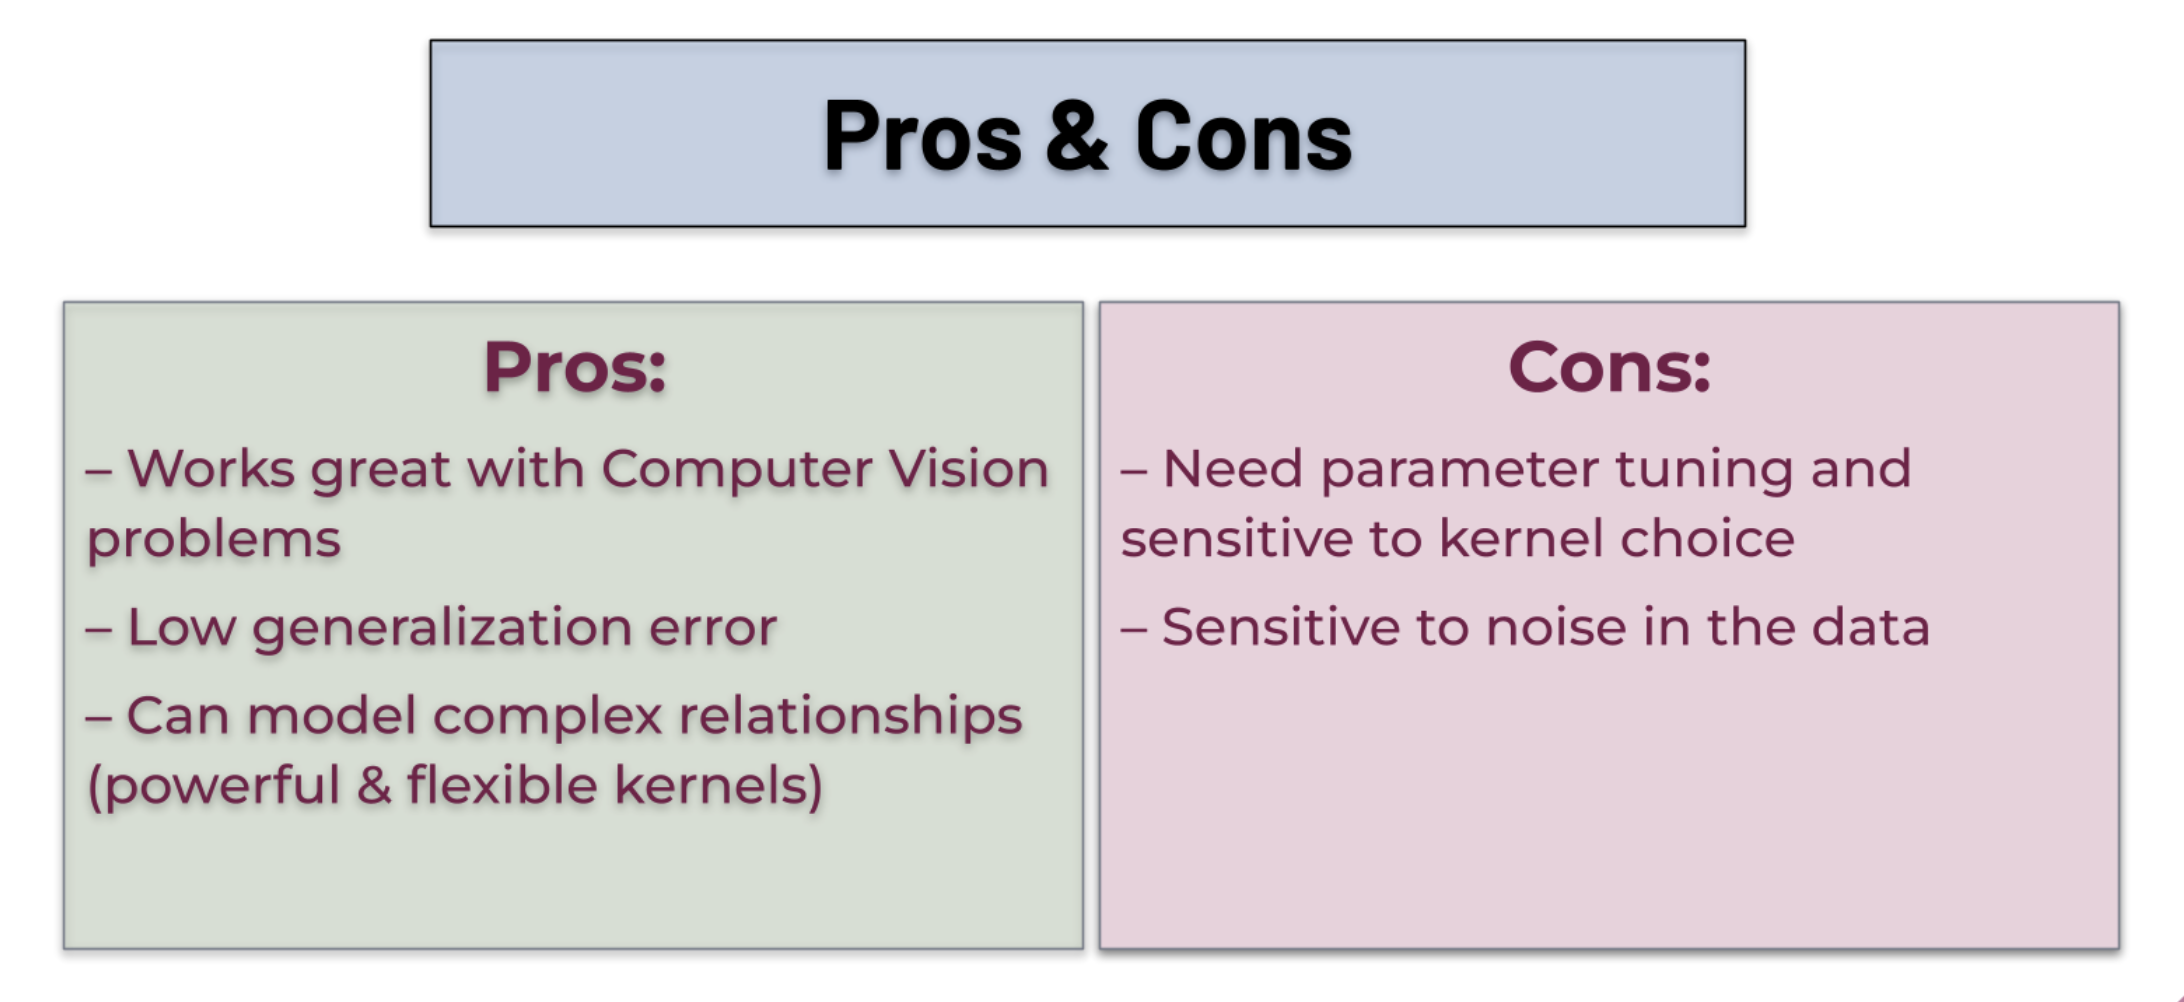

# Hands-on SVM Classification

[Source for practice](https://www.youtube.com/watch?v=x7igboqib68)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [5]:
rand_state = 1000

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%2016-17%20SVM%20(Python)/bikeshare.csv")
df.head()

# first insights:
# continuous variables: temp, hum and windspeed have been already standardized, we don't need to normalize them
# dteday can be dropped
# cnt feature will be updated as overload according to the below and over 500
# all other variables (first to categorical) will be dummied

season  yr  mnth  hr  holiday  weekday  notbizday  weathersit      temp  \
0       1   0     1   0        0        6          1           1 -1.334609   
1       1   0     1   1        0        6          1           1 -1.438475   
2       1   0     1   2        0        6          1           1 -1.438475   
3       1   0     1   3        0        6          1           1 -1.334609   
4       1   0     1   4        0        6          1           1 -1.334609   

        hum  windspeed      dteday  cnt  
0  0.947345  -1.553844  2011-01-01   16  
1  0.895513  -1.553844  2011-01-01   40  
2  0.895513  -1.553844  2011-01-01   32  
3  0.636351  -1.553844  2011-01-01   13  
4  0.636351  -1.553844  2011-01-01    1

# Data preprocessing

In [6]:
df.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads.

In [9]:
df[df.cnt>500]

season  yr  mnth  hr  holiday  weekday  notbizday  weathersit  \
2659        2   0     4  17        0        1          0           1   
2683        2   0     4  17        0        2          0           1   
2684        2   0     4  18        0        2          0           1   
2707        2   0     4  17        0        3          0           3   
2732        2   0     4  18        0        4          0           1   
...       ...  ..   ...  ..      ...      ...        ...         ...   
17063       4   1    12  18        0        2          0           1   
17077       4   1    12   8        0        3          0           1   
17086       4   1    12  17        0        3          0           1   
17087       4   1    12  18        0        3          0           1   
17101       4   1    12   8        0        4          0           2   

           temp       hum  windspeed      dteday  cnt  
2659   1.054305 -0.452127   0.886073  2011-04-25  521  
2683   0.950439 -0.089301   1.374057  2011-04-26  521  
2684   0.950439  0.118028   2.106440  2011-04-26  528  
2707   0.846573  1.051010   1.618457  2011-04-27  521  
2732   0.742707 -0.814953   1.374057  2011-04-28  530  
...         ...       ...        ...         ...  ...  
17063 -0.607548 -0.866786   1.130474  2012-12-18  525  
17077 -1.334609  1.258339  -0.699669  2012-12-19  678  
17086 -0.503683 -0.659457   1.618457  2012-12-19  562  
17087 -0.607548 -0.659457   1.374057  2012-12-19  569  
17101 -1.023012  0.377190  -1.553844  2012-12-20  599  

[1279 rows x 13 columns]

In [11]:
# any duplicates?
df.duplicated().sum()

0

In [7]:
# assign overload as target
overload = np.where(df['cnt']>500,1,0)

In [8]:
pd.crosstab(overload,overload, normalize='all')*100

# The dataset is relatively imbalanced.

# 40-60, 50-50, 35-65 can be accepted as relatively balanced; higher ratios would be relatively imbalanced

col_0          0         1
row_0                     
0      92.640543  0.000000
1       0.000000  7.359457

In [12]:
# change the type of categorical columns
df['overload']=overload
df.drop('cnt', axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'overload'],
      dtype='object')

In [66]:
df.overload.value_counts()

0    16100
1     1279
Name: overload, dtype: int64

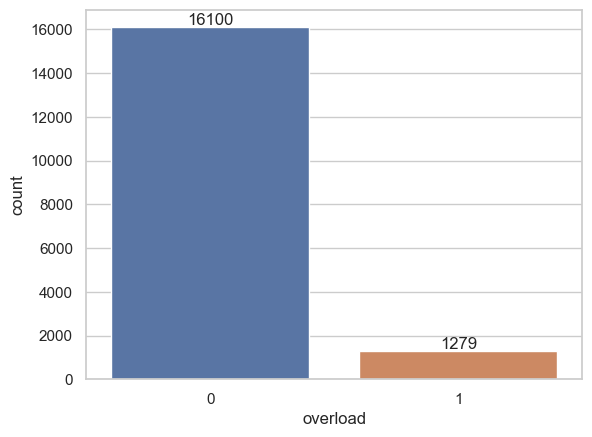

In [63]:
# visualize the classes with countplot
ax = sns.countplot(x='overload', data=df)
ax.bar_label(ax.containers[0]);

In [13]:
# convert the columns to category dtype
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday','weathersit',]

for col in categorical: 
    df[col] = df[col].astype("category")

In [14]:
# check it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   notbizday   17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  object  
 12  overload    17379 non-null  int64   
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 817.0+ KB


In [15]:
# drop the dtaday column. weekday or bizday work well
df.drop('dteday',axis=1, inplace=True)

In [16]:
# see the non-categorical columns
df.columns.difference(categorical)

Index(['hum', 'overload', 'temp', 'windspeed'], dtype='object')

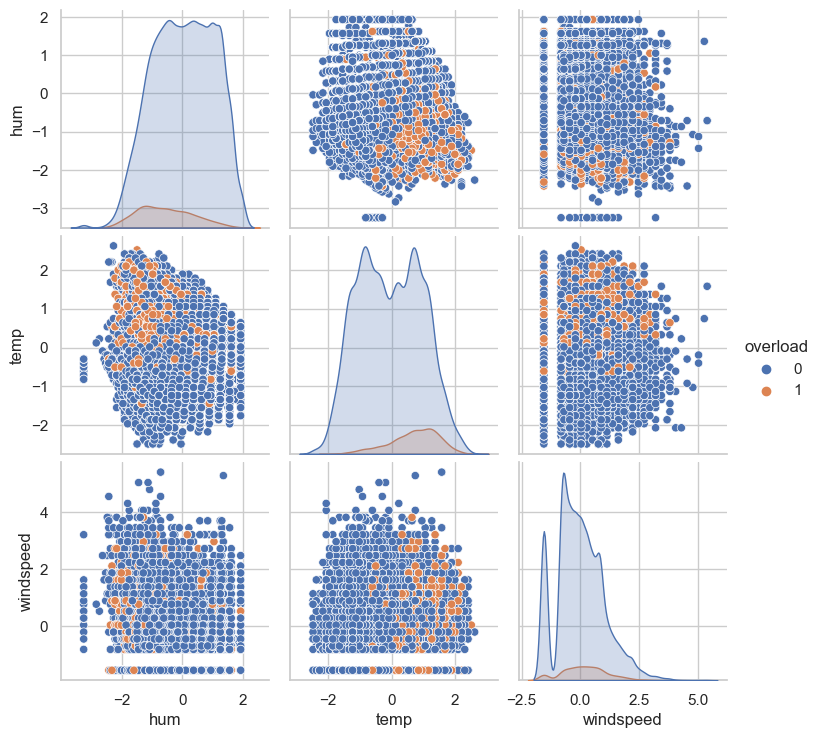

In [18]:
# check how the classes are separated from each other with pairplot
# target for color
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)], hue='overload')

# maybe not for regression, but pairplot is important for classification to see the classes are separated from 
# each other or not

# Scaling the features:

Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the distance between observations.

for this data set we are going to use standardization as our scaling strategy.

In [19]:
# dummy the categorical columns
df = pd.get_dummies(df, drop_first=True)

# get dummies increased the dimensionality, we have 53 columns now, that's why KNN does not perform
# efficiently for this data anymore and we should use SVM. with high dimesionality, SVM is more powerful

In [20]:
df.columns

Index(['temp', 'hum', 'windspeed', 'overload', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [21]:
df.shape

(17379, 53)

In [22]:
df.head(2)

temp       hum  windspeed  overload  season_2  season_3  season_4  \
0 -1.334609  0.947345  -1.553844         0         0         0         0   
1 -1.438475  0.895513  -1.553844         0         0         0         0   

   yr_1  mnth_2  mnth_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0     0       0       0  ...          0          0          0          0   
1     0       0       0  ...          0          0          0          0   

   weekday_5  weekday_6  notbizday_1  weathersit_2  weathersit_3  weathersit_4  
0          0          1            1             0             0             0  
1          0          1            1             0             0             0  

[2 rows x 53 columns]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# scale the data and load target again
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc['overload']=df['overload']

# we'll standardize entire df
# however, we don't want our target variable to be standardzed, so we have loaded it back again 

In [25]:
df_sc.head()

temp       hum  windspeed  overload  season_2  season_3  season_4  \
0 -1.334648  0.947372  -1.553889         0 -0.583042 -0.590751 -0.567361   
1 -1.438516  0.895539  -1.553889         0 -0.583042 -0.590751 -0.567361   
2 -1.438516  0.895539  -1.553889         0 -0.583042 -0.590751 -0.567361   
3 -1.334648  0.636370  -1.553889         0 -0.583042 -0.590751 -0.567361   
4 -1.334648  0.636370  -1.553889         0 -0.583042 -0.590751 -0.567361   

       yr_1    mnth_2    mnth_3  ...  weekday_1  weekday_2  weekday_3  \
0 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
1 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
2 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
3 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
4 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   

   weekday_4  weekday_5  weekday_6  notbizday_1  weathersit_2  weathersit_3  \
0  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
1  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
2  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
3  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
4  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   

   weathersit_4  
0      -0.01314  
1      -0.01314  
2      -0.01314  
3      -0.01314  
4      -0.01314  

[5 rows x 53 columns]

# Defining the variables and splitting the data

In [26]:
# X independent y dependent
y = df_sc['overload']
X = df_sc.drop('overload', axis=1) #inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

# SVM Classification with Sklearn

In [27]:
# import SVC
from sklearn.svm import SVC  # support vector machine classification (SVR stands for SVM regression)

In [28]:
# Fitting SVM classification to the Training set
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [29]:
# Predicting the Test set results
y_hat = SVM_classification.predict(X_test)

In [30]:
# compare the actual values and predictions
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.tail(20)

y_test  y_hat
17161       0      0
10948       1      1
4579        1      0
7639        0      0
13180       0      0
13129       0      0
852         0      0
15113       0      0
5733        0      0
13623       0      0
10101       0      0
5791        0      0
9353        0      0
2305        0      0
13309       1      1
2447        0      0
10818       0      0
3131        0      0
3890        0      0
10858       0      0

# Evaluating the model on test dataset¶

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# use defined function for evaluation metrics

def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf'):
    svc= SVC(C=C, gamma=gamma, kernel=kernel)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled

In [32]:
# since the data is imbalaced, accuracy is not a good metric for the performance. Therefore check f1 score.

my_SVM_report(X_train, y_train, X_test,y_test, kernel='rbf')

-----------------------------------------
Accuracy  = 0.9701
Error_rate  = 0.0299
Precision = 0.88
Recall    = 0.7
f1_score  = 0.78
-----------------------------------------


Predict : negative  Predict :positive 
Actual : negative                 4782                  37
Actual : positive                  119                 276

**Why we cannot define ROC and AUC in SVM for this data?**

ROC - AUC make calculations for different thresholds but we don't have different thresholds in svm. In addition, data is imbalanced.

# Tuning hyperparameters:

# Gridsearch

Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

. **C represents cost of misclassification**. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

. gamma is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’. https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

What fit does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.

In [33]:
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['rbf']} 

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=1, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [37]:
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=1, cv=5 )
# verbose just means the text output describing the process.  (the greater the number the more detail).

In [38]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [41]:
y_hat_optimized = grid.predict(X_test)

In [42]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.tail(20)

y_test  y_hat  y_hat_optimized
17161       0      0                0
10948       1      1                1
4579        1      0                1
7639        0      0                0
13180       0      0                0
13129       0      0                0
852         0      0                0
15113       0      0                0
5733        0      0                0
13623       0      0                0
10101       0      0                0
5791        0      0                0
9353        0      0                0
2305        0      0                0
13309       1      1                1
2447        0      0                0
10818       0      0                0
3131        0      0                0
3890        0      0                0
10858       0      0                0

In [43]:
my_SVM_report(X_train, y_train, X_test,y_test,C=1000, gamma=0.001)

# f1 score has incrased from 0.78 to 0.82. it's a good score

-----------------------------------------
Accuracy  = 0.9737
Error_rate  = 0.0263
Precision = 0.84
Recall    = 0.81
f1_score  = 0.82
-----------------------------------------


Predict : negative  Predict :positive 
Actual : negative                 4758                  61
Actual : positive                   76                 319

# Cross validation

We will use Cross validation to estimate performance metrics in the test set.

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
# since the dataset is imbalanced, rather than accuracy we'll get f1. 
# svc should be set to optimal parameteres. c 1000 and gamma 0.001
f1_score = cross_val_score(estimator = SVC(C=1000, gamma=0.001), X = X_train, y = y_train, cv = 5 , scoring="f1" )

In [46]:
f1_score

array([0.820059  , 0.83775811, 0.84813754, 0.82253521, 0.7877095 ])

In [47]:
f1_CV=round(f1_score.mean(),4)
f1_CV

# again 0.82

0.8232

# Advance Visualization (Optimal)

Visualising the Training set results (in 2D). We have to rerun the whole model with 2 explanatory variables

Let's balance our target variables first!

In [48]:
df_vis = df_sc[['overload', 'temp', 'windspeed']]
# for 2 d we'll get 2 ind variables

In [49]:
pd.crosstab(df_vis['overload'], df_vis['overload'])

overload      0     1
overload             
0         16100     0
1             0  1279

Imbalanced bir datayı nasıl balance yapariz: (egitim icin)

sayisi fazla olan classı digerinin sayisina indir. bu ornekte 1279 kalsin, 16100u de 1279a indir

50-50 yerine 60-40 de yapilabilir ornegin

In [50]:
# sadece 1 olanlar
df_vis.loc[df_vis['overload']==1,].head()

overload      temp  windspeed
2659         1  1.054335   0.886099
2683         1  0.950466   1.374096
2684         1  0.950466   2.106501
2707         1  0.846597   1.618504
2732         1  0.742729   1.374096

In [52]:
# samplea her zaman bir list pass edilir. ornek:
from random import sample
sample(list(df_vis.loc[df_vis['overload']==0,].index),5)

[3793, 13567, 1063, 9519, 5769]

In [53]:
# 100 0 class 100 1 classtan aldık. ama 1500 1600e 1200 de alabilirdik
overloads_only     = sample(list(df_vis.loc[df_vis['overload']==1,].index),100)
non_overloads_only = sample(list(df_vis.loc[df_vis['overload']==0,].index),100)
df1 = df_vis.iloc[overloads_only,]
df0 = df_vis.iloc[non_overloads_only,]

In [54]:
df_vis = pd.concat([df1,df0]) 
df_vis

overload      temp  windspeed
15829         1  0.327253  -0.456099
14125         1  1.573679  -1.553889
15470         1 -0.295959  -0.456099
13419         1  1.469810  -0.699689
4867          1  1.885286   1.374096
...         ...       ...        ...
13867         0  1.158204  -1.553889
14649         0  1.573679   0.519896
8602          0 -1.438516  -0.821484
11050         0  0.223385   0.031899
11265         0  0.431122  -1.553889

[200 rows x 3 columns]

In [55]:
X= df_vis[['temp', 'windspeed']]
y= df_vis[['overload']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Fitting SVM classifier to the Training set

In [57]:
SVM_classifier = SVC(C=1, kernel='rbf')
SVM_classifier.fit(X_train, y_train.values.reshape(-1,))

SVC(C=1)

In [58]:
# Predicting the Test set results
y_pred = SVM_classifier.predict(X_test)

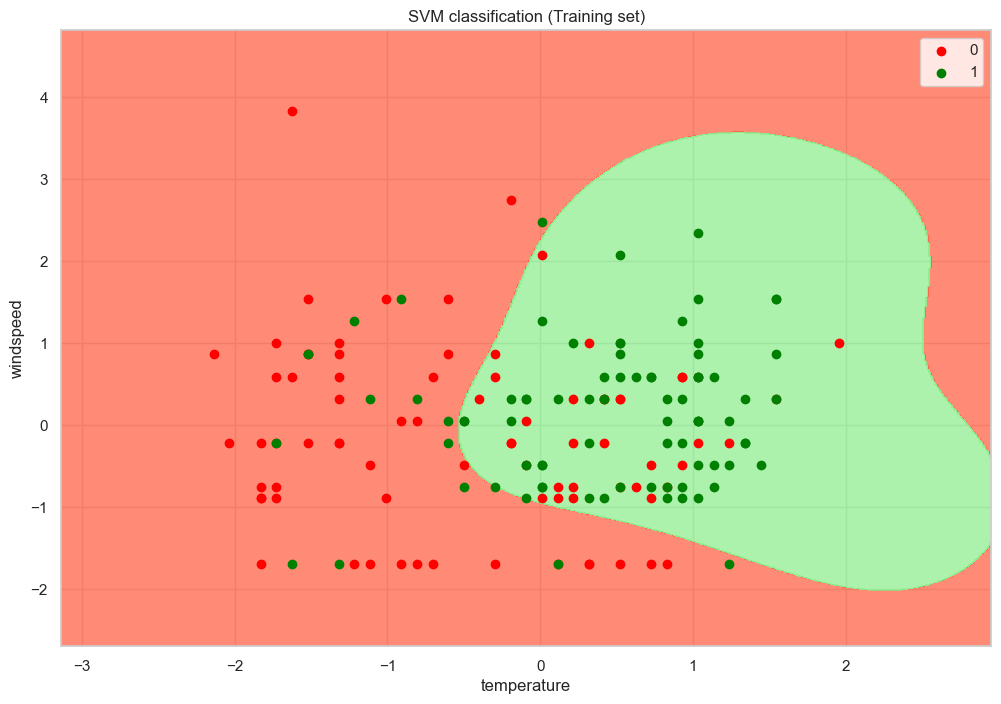

In [59]:
# visualization of the decision boundary -- train set
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM classification (Training set)')
plt.xlabel('temperature')
plt.ylabel('windspeed')
plt.legend()
plt.show()

# Visualising the Test set results

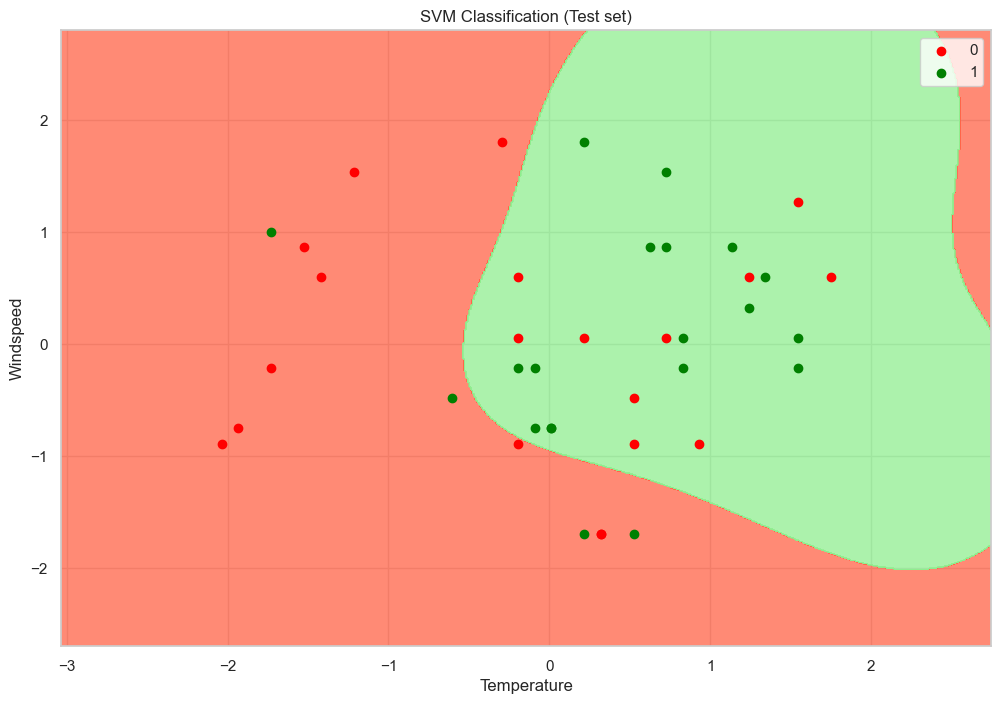

In [60]:
# test set
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
plt.legend()
plt.show()

In [61]:
print(confusion_matrix(y_test, y_pred))

[[10 10]
 [ 4 16]]


# SVM REGRESSION

In [68]:
# replace the binary overload feature with continuous cnt again

df1 = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%2016-17%20SVM%20(Python)/bikeshare.csv")
df=df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [69]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday','weathersit',]

for col in categorical: 
    df[col] = df[col].astype("category")

In [70]:
df.drop('dteday',axis=1, inplace=True)

In [71]:
df.columns.difference(categorical)

Index(['cnt', 'hum', 'temp', 'windspeed'], dtype='object')

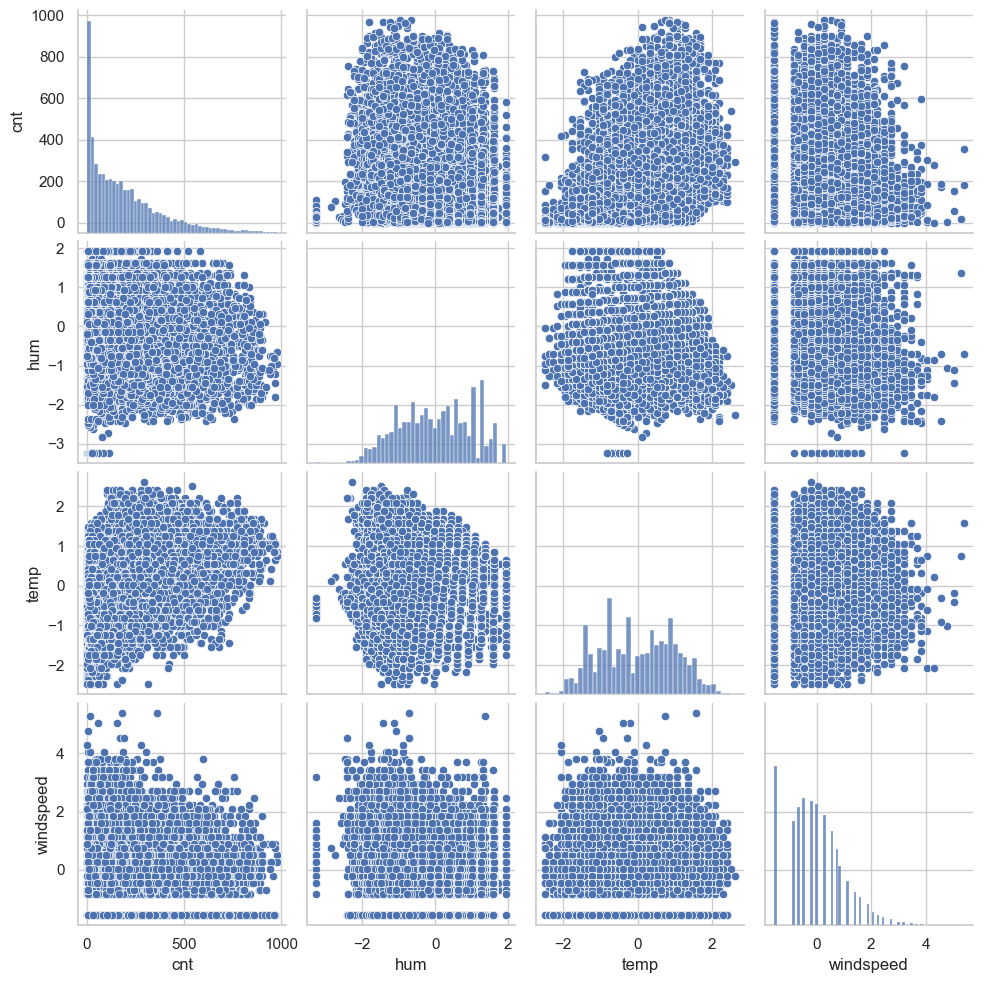

In [72]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)]);
# since our target is continuous, we can't get it colored as in classification

# for our target feature cnt, we can't do logtransformation bec there are many 0s.

# Scaling the features:

Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the distance between observations.

for this data set we are going to use standardization as our scaling strategy.

In [73]:
df = pd.get_dummies(df, drop_first=True)

In [74]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
# tum data scale edildi sadece bu datanın iyi dagilimindan dolayı lekage olmayacagi icin. dikkat! cok tercih edilmemeli
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [77]:
df_sc.head()

temp       hum  windspeed       cnt  season_2  season_3  season_4  \
0 -1.334648  0.947372  -1.553889 -0.956339 -0.583042 -0.590751 -0.567361   
1 -1.438516  0.895539  -1.553889 -0.824022 -0.583042 -0.590751 -0.567361   
2 -1.438516  0.895539  -1.553889 -0.868128 -0.583042 -0.590751 -0.567361   
3 -1.334648  0.636370  -1.553889 -0.972879 -0.583042 -0.590751 -0.567361   
4 -1.334648  0.636370  -1.553889 -1.039037 -0.583042 -0.590751 -0.567361   

       yr_1    mnth_2    mnth_3  ...  weekday_1  weekday_2  weekday_3  \
0 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
1 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
2 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
3 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   
4 -1.005134 -0.289161 -0.304313  ...  -0.407892  -0.405394  -0.407508   

   weekday_4  weekday_5  weekday_6  notbizday_1  weathersit_2  weathersit_3  \
0  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
1  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
2  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
3  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   
4  -0.407124  -0.408659   2.432774       1.4669     -0.595006     -0.298177   

   weathersit_4  
0      -0.01314  
1      -0.01314  
2      -0.01314  
3      -0.01314  
4      -0.01314  

[5 rows x 53 columns]

# Defining the variables and splitting the data

In [78]:
y = df_sc['cnt']
X = df_sc.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

# SVM Regression with Sklearn

In [80]:
from sklearn.svm import SVR # SVM regression

In [81]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [82]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [83]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

y_test     y_hat
4495  -0.901207 -0.947701
4418  -0.785430 -0.798810
7141  -0.983905 -1.078712
14765  0.085658  0.105907
16541 -0.686192 -0.678443

# Evaluating the model on test dataset

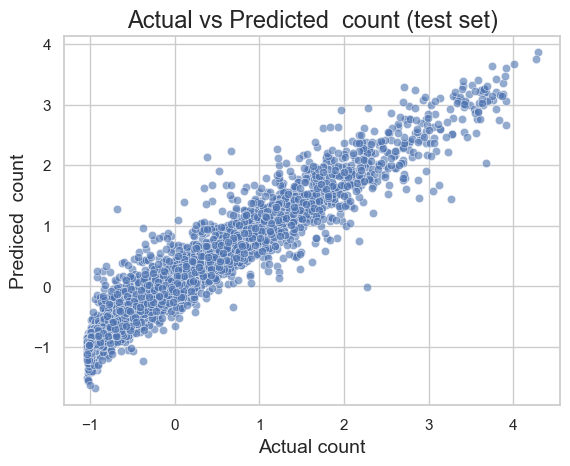

In [86]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

In [87]:
SVM_regression.score(X_test, y_test)
# bu r score. peki cok fazla feature olmasina ragmen neden adjusted r score kullanmadik? cunku burasi
# train set degil test set.

0.9314701410731606

In [88]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.26

# Tuning hyperparameters:

# Gridsearch

In [89]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [92]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [93]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  34.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  37.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  36.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  35.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  28.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  13.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  12.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  12.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  12.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   6.7s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [94]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [95]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

In [96]:
y_hat_optimized = grid.predict(X_test)

In [97]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

y_test     y_hat  y_hat_optimized
4495  -0.901207 -0.947701        -0.927833
4418  -0.785430 -0.798810        -0.794302
7141  -0.983905 -1.078712        -1.105306
14765  0.085658  0.105907         0.075366
16541 -0.686192 -0.678443        -0.773309

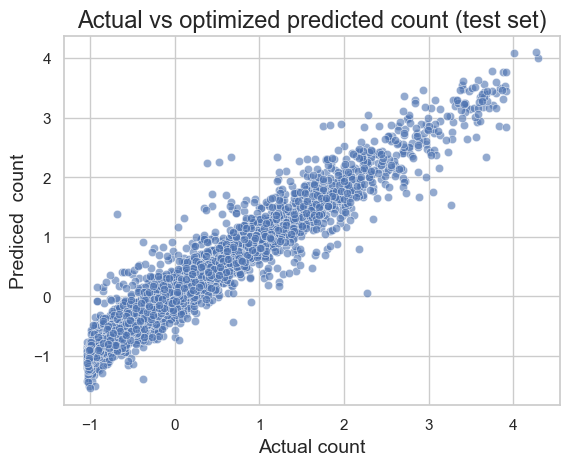

In [99]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [100]:
grid.score(X_test, y_test)

0.9426643581859374

In [101]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.24

# Cross Validation

Cross validation to estimate performance metrics in the test set.

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [104]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.261